In [ ]:
# If pytorch is not installed, have to run the below command
#pip install torch torchvision matplotlib

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d0/db/5d9cbfbc7968d79c5c09a0bc0bc3735da079f2fd07cc10498a62b320a480/torch-2.5.1-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/28/57/4d7ad90be612f5ac6c4bdafcb0ff13e818e14a340a88c8ca00d9ed8c2dad/torchvision-0.20.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 37.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [17]:
# Importing all the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transformations to normalize and convert data to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalization for 1 channel
])

# Load training and test datasets
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 29.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 824kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 7.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.40MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
print(f'Size of Train dataset --- {len(train_loader)}')
print(f'Size of Test dataset --- {len(test_loader)}')

Size of Train dataset --- 938
Size of Test dataset --- 157


In [13]:
# Defining the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(NeuralNet, self).__init__()
        self.f0 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.f1 = nn.Linear(128, 256)
        self.f2 = nn.Linear(256, 100)
        self.f3 = nn.Linear(100, num_classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # flatten the input tensor
        x = self.f0(x)
        x = self.relu(x)
        x = self.f1(x)
        x = self.relu(x)
        x = self.f2(x)
        x = self.relu(x)
        x = self.f3(x)

        return x

In [14]:
# Instantiate the model, loss, and the optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet().to(device)
criterion = nn.CrossEntropyLoss() # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

In [15]:
# Train the model
epochs = 5

for ep in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        ouputs = model(images)
        loss = criterion(ouputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f'Epoch [{ep + 1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

Epoch [1/5], Loss: 0.3584
Epoch [2/5], Loss: 0.1561
Epoch [3/5], Loss: 0.1190
Epoch [4/5], Loss: 0.0969
Epoch [5/5], Loss: 0.0845


In [16]:
# Test the model
# set the model to evaluation mode
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        ouputs = model(images)
        _, predicted = torch.max(ouputs.data, 1) # Get class with the max probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct/total:.2f}%')

Accuracy on the test dataset: 97.19%


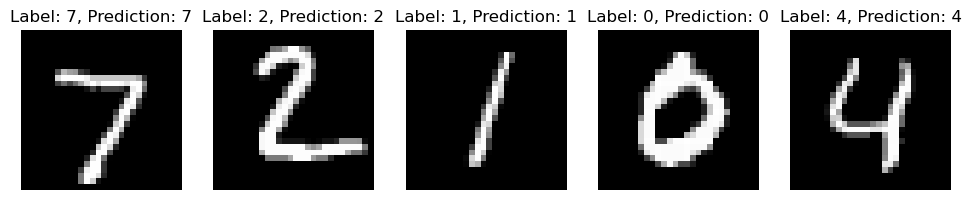

In [18]:
# Visualizing few predictions
classes = [str(i) for i in range(10)]
images, labels = next(iter(test_loader))
images, labels = images[:5].to(device), labels[:5].to(device)

ouputs = model(images)
_, predictions = torch.max(ouputs, 1)

# Plotting the images and their respective predictions
images = images.cpu().numpy()
fig, axes = plt.subplots(1, 5, figsize=(12,4))

for i, ax in enumerate(axes):
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}, Prediction: {predictions[i].item()}')
    ax.axis('off')

plt.show()